In [256]:
# NBA_API headers

headers  = {
    'Connection': 'keep-alive',
    'Accept': 'application/json, text/plain, */*',
    'x-nba-stats-token': 'true',
    'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/79.0.3945.130 Safari/537.36',
    'x-nba-stats-origin': 'stats',
    'Sec-Fetch-Site': 'same-origin',
    'Sec-Fetch-Mode': 'cors',
    'Referer': 'https://stats.nba.com/',
    'Accept-Encoding': 'gzip, deflate, br',
    'Accept-Language': 'en-US,en;q=0.9',
}

In [257]:
# Python libraries, APIs, and functions

import pandas as pd
import requests
from nba_api.stats.static import players
from nba_api.stats.endpoints import commonplayerinfo
import time
import matplotlib.pyplot as plt

In [258]:
# This static endpoint is limited on the number of players present (approximately 1/3 of active players) 
# and limited on the features available of the small number of players

nba_players = players.get_players()
df = pd.DataFrame(nba_players)
df_active = df[(df['is_active'] == True)]
df_active.head()

,id,full_name,first_name,last_name,is_active
10,1630173,Precious Achiuwa,Precious,Achiuwa,True
22,203500,Steven Adams,Steven,Adams,True
24,1628389,Bam Adebayo,Bam,Adebayo,True
29,1630534,Ochai Agbaji,Ochai,Agbaji,True
41,1630583,Santi Aldama,Santi,Aldama,True


In [259]:
# API endpoint provided to filter for active players only

active_players = players.get_active_players()

In [260]:
# Created a list of all active player IDs

active_player_id_list = []

for i in active_players:
#     print(i['id'])
    active_player_id_list.append(i['id'])

# print(active_player_id_list)

In [261]:
# This function will grab each player's information from CommonPlayerInfo and return a data frame for the 
# for loop in the following step

def get_info(player_id):
    player_info = commonplayerinfo.CommonPlayerInfo(player_id=player_id, headers=headers,timeout=100)
    df = player_info.common_player_info.get_data_frame()
    return df

In [262]:
# 2023-Mar-14: created a final df of full CommonPlayerInfo for all active player IDs
# csv saved in order to not require approximately 580 active player dataset created every run, 
# which takes about 29 minutes on 3 second sleep

# active_player_data = []
# for player_id in active_player_ids:
#     print(player_id)
#     player_info = get_info(player_id)
#     active_player_data.append(player_info)
#     time.sleep(3)

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
# df = pd.concat(active_player_data, ignore_index=True)
# df
# df.to_csv('active_players.csv')

In [263]:
# read csv saved in previous step

df = pd.read_csv('active_players.csv')

In [264]:
# audit the data to see columns available, non-null counts, and data types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 582 entries, 0 to 581
Data columns (total 34 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        582 non-null    int64  
 1   PERSON_ID                         582 non-null    int64  
 2   FIRST_NAME                        582 non-null    object 
 3   LAST_NAME                         582 non-null    object 
 4   DISPLAY_FIRST_LAST                582 non-null    object 
 5   DISPLAY_LAST_COMMA_FIRST          582 non-null    object 
 6   DISPLAY_FI_LAST                   582 non-null    object 
 7   PLAYER_SLUG                       582 non-null    object 
 8   BIRTHDATE                         582 non-null    object 
 9   SCHOOL                            581 non-null    object 
 10  COUNTRY                           582 non-null    object 
 11  LAST_AFFILIATION                  582 non-null    object 
 12  HEIGHT  

In [265]:
# Removing certain columns that are redundant such as multiple variations of names and teams, and flags

columns_to_drop = [
        'Unnamed: 0',
        'DISPLAY_LAST_COMMA_FIRST', 
        'DISPLAY_FIRST_LAST', 
        'DISPLAY_FI_LAST', 
        'PLAYER_SLUG', 
        'PLAYERCODE', 
        'GAMES_PLAYED_CURRENT_SEASON_FLAG', 
        'TEAM_ID', 
        'TEAM_CODE', 
        'DLEAGUE_FLAG'
    ]

for c in columns_to_drop:
    try:
        df = df.drop(c)
    except KeyError as e:
        print(e)
        pass

"['Unnamed: 0'] not found in axis"
"['DISPLAY_LAST_COMMA_FIRST'] not found in axis"
"['DISPLAY_FIRST_LAST'] not found in axis"
"['DISPLAY_FI_LAST'] not found in axis"
"['PLAYER_SLUG'] not found in axis"
"['PLAYERCODE'] not found in axis"
"['GAMES_PLAYED_CURRENT_SEASON_FLAG'] not found in axis"
"['TEAM_ID'] not found in axis"
"['TEAM_CODE'] not found in axis"
"['DLEAGUE_FLAG'] not found in axis"


In [266]:
missing = pd.concat([df.isnull().sum(), 100 * df.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count', ascending=False)

,count,%
TEAM_ABBREVIATION,66,11.340206
TEAM_CODE,66,11.340206
JERSEY,66,11.340206
TEAM_CITY,66,11.340206
TEAM_NAME,66,11.340206
HEIGHT,22,3.780069
POSITION,22,3.780069
TO_YEAR,22,3.780069
FROM_YEAR,22,3.780069
WEIGHT,22,3.780069


TEAM_CITY, TEAM_ABBREVIATION, TEAM_NAME, and JERSEY all are missing the most values at 66 of 582.
Followed by HEIGHT, WEIGHT, POSITION, and YEARS at 22 missing.

In [267]:
df_team_na = df[(df['TEAM_CITY'].isna())]
df_team_na

,Unnamed: 0,PERSON_ID,FIRST_NAME,LAST_NAME,DISPLAY_FIRST_LAST,DISPLAY_LAST_COMMA_FIRST,DISPLAY_FI_LAST,PLAYER_SLUG,BIRTHDATE,SCHOOL,COUNTRY,LAST_AFFILIATION,HEIGHT,WEIGHT,SEASON_EXP,JERSEY,POSITION,ROSTERSTATUS,GAMES_PLAYED_CURRENT_SEASON_FLAG,TEAM_ID,TEAM_NAME,TEAM_ABBREVIATION,TEAM_CODE,TEAM_CITY,PLAYERCODE,FROM_YEAR,TO_YEAR,DLEAGUE_FLAG,NBA_FLAG,GAMES_PLAYED_FLAG,DRAFT_YEAR,DRAFT_ROUND,DRAFT_NUMBER,GREATEST_75_FLAG
22,22,1629071,LiAngelo,Ball,LiAngelo Ball,"Ball, LiAngelo",L. Ball,liangelo-ball,1998-11-24T00:00:00,,USA,UCLA/USA,NaN,NaN,0,NaN,NaN,Inactive,Y,0,NaN,NaN,NaN,NaN,liangelo_ball,NaN,NaN,Y,N,Y,2018,NaN,NaN,N
41,41,1631262,Jules,Bernard,Jules Bernard,"Bernard, Jules",J. Bernard,jules-bernard,2000-01-21T00:00:00,UCLA,USA,UCLA/USA,NaN,NaN,0,NaN,NaN,Inactive,Y,0,NaN,NaN,NaN,NaN,jules_bernard,NaN,NaN,Y,N,Y,Undrafted,Undrafted,Undrafted,N
45,45,1631234,Marcus,Bingham Jr.,Marcus Bingham Jr.,"Bingham Jr., Marcus",M. Bingham Jr.,marcus-bingham-jr,2000-07-14T00:00:00,Michigan State,USA,Michigan State/USA,NaN,NaN,0,NaN,NaN,Inactive,Y,0,NaN,NaN,NaN,NaN,marcus_bingham_jr,NaN,NaN,N,N,Y,Undrafted,Undrafted,Undrafted,N
53,53,1629716,Marques,Bolden,Marques Bolden,"Bolden, Marques",M. Bolden,marques-bolden,1998-04-17T00:00:00,Duke,USA,Duke/USA,6-10,249.0,3,NaN,Center,Inactive,Y,0,NaN,NaN,NaN,NaN,marques_bolden,2019.0,2020.0,Y,Y,Y,2019,NaN,NaN,N
54,54,1630195,Leandro,Bolmaro,Leandro Bolmaro,"Bolmaro, Leandro",L. Bolmaro,leandro-bolmaro,2000-09-11T00:00:00,FC Barcelona,Argentina,FC Barcelona/Argentina,6-6,200.0,1,NaN,Forward,Inactive,Y,0,NaN,NaN,NaN,NaN,leandro_bolmaro,2021.0,2022.0,Y,Y,Y,2020,1,23,N
59,59,1631123,Jamaree,Bouyea,Jamaree Bouyea,"Bouyea, Jamaree",J. Bouyea,jamaree-bouyea,1999-06-27T00:00:00,San Francisco,USA,San Francisco/USA,6-2,180.0,0,NaN,Guard,Inactive,Y,0,NaN,NaN,NaN,NaN,jamaree_bouyea,2022.0,2022.0,Y,Y,Y,Undrafted,Undrafted,Undrafted,N
60,60,1628396,Tony,Bradley,Tony Bradley,"Bradley, Tony",T. Bradley,tony-bradley,1998-01-08T00:00:00,North Carolina,USA,North Carolina/USA,6-11,248.0,5,NaN,Center-Forward,Inactive,Y,0,NaN,NaN,NaN,NaN,tony_bradley,2017.0,2022.0,Y,Y,Y,2017,1,28,N
68,68,1631122,Gabe,Brown,Gabe Brown,"Brown, Gabe",G. Brown,gabe-brown,2000-03-05T00:00:00,Michigan State,USA,Michigan State/USA,NaN,NaN,0,NaN,NaN,Inactive,Y,0,NaN,NaN,NaN,NaN,gabe_brown,NaN,NaN,Y,N,Y,Undrafted,Undrafted,Undrafted,N
71,71,1629650,Moses,Brown,Moses Brown,"Brown, Moses",M. Brown,moses-brown,1999-10-13T00:00:00,UCLA,USA,UCLA/USA,7-2,245.0,3,NaN,Center,Inactive,Y,0,NaN,NaN,NaN,NaN,moses_brown,2019.0,2022.0,Y,Y,Y,Undrafted,Undrafted,Undrafted,N
72,72,1630535,Greg,Brown III,Greg Brown III,"Brown III, Greg",G. Brown III,greg-brown-iii,2001-09-01T00:00:00,Texas,USA,Texas/USA,6-7,206.0,1,NaN,Forward,Inactive,Y,0,NaN,NaN,NaN,NaN,greg_brown_iii,2021.0,2022.0,Y,Y,Y,2021,2,43,N


Are these junior/rookie players who are undrafted? Let's find the average number of seasons experience.

In [268]:
season_xp_team_na = df_team_na.loc[:, 'SEASON_EXP'].mean()
season_xp_team_na_med = df_team_na.loc[:, 'SEASON_EXP'].median()
print(f"The average number of seasons with player's team listed as NaN is {round(season_xp_team_na, 2)} with a median of {season_xp_team_na_med}.")

The average number of seasons with player's team listed as NaN is 2.41 with a median of 1.0.


In [269]:
df_team = df[(df['TEAM_CITY'].notna())]
season_xp_team = df_team.loc[:, 'SEASON_EXP'].mean()
season_xp_team_med = df_team.loc[:, 'SEASON_EXP'].median()
print(f"The average number of seasons with players with a team is {round(season_xp_team, 2)} with a median of {season_xp_team_med}.")

The average number of seasons with players with a team is 4.47 with a median of 3.0.


Text(0.5, 0, 'Count')

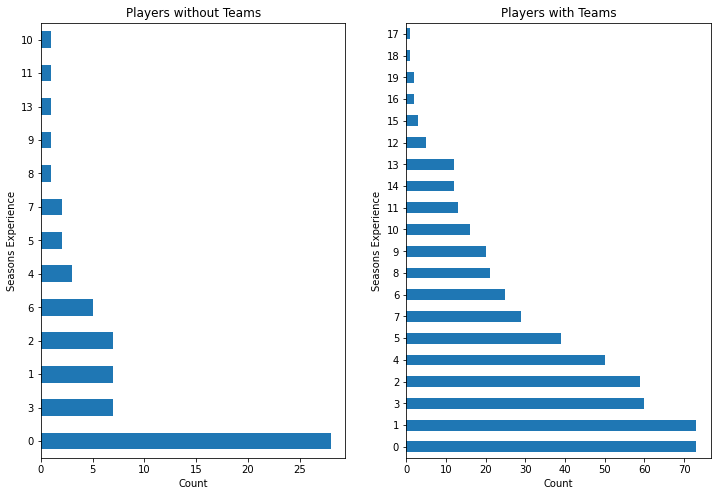

In [270]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))
df_team_na.SEASON_EXP.value_counts().plot(kind='barh', ax=ax[0])
ax[0].set_title('Players without Teams')
ax[0].set_xlabel('Count')
ax[0].set_ylabel('Seasons Experience')
df_team.SEASON_EXP.value_counts().plot(kind='barh', ax=ax[1])
ax[1].set_title('Players with Teams')
ax[1].set_ylabel('Seasons Experience')
ax[1].set_xlabel('Count')

There certainly are more junior players with teams, however it is more likely for a junior player to not be listed on a team. Later I may want to drop these less experienced players without teams.

In [271]:
# Now to see if the players without teams are simply ROSTERSTATUS Inactive.

df_inactive = df[(df['ROSTERSTATUS'] == 'Inactive')]
df_inactive.PERSON_ID.count()

99

In [272]:
# There are probably 33 inactive players with teams versus 66 without teams listed.
inactive_team_na = df.loc[(df['ROSTERSTATUS'] == 'Inactive') & (df['TEAM_NAME'].isna())]
inactive_team = df.loc[(df['ROSTERSTATUS'] == 'Inactive') & (df['TEAM_NAME'].notna())]


print(f"The number of inactive without a team is {inactive_team_na.PERSON_ID.count()} while the number of inactive players with a team is {inactive_team.PERSON_ID.count()}.")

The number of inactive without a team is 66 while the number of inactive players with a team is 33.


In [273]:
df.select_dtypes(object)

,FIRST_NAME,LAST_NAME,DISPLAY_FIRST_LAST,DISPLAY_LAST_COMMA_FIRST,DISPLAY_FI_LAST,PLAYER_SLUG,BIRTHDATE,SCHOOL,COUNTRY,LAST_AFFILIATION,HEIGHT,POSITION,ROSTERSTATUS,GAMES_PLAYED_CURRENT_SEASON_FLAG,TEAM_NAME,TEAM_ABBREVIATION,TEAM_CODE,TEAM_CITY,PLAYERCODE,DLEAGUE_FLAG,NBA_FLAG,GAMES_PLAYED_FLAG,DRAFT_YEAR,DRAFT_ROUND,DRAFT_NUMBER,GREATEST_75_FLAG
0,Precious,Achiuwa,Precious Achiuwa,"Achiuwa, Precious",P. Achiuwa,precious-achiuwa,1999-09-19T00:00:00,Memphis,Nigeria,Memphis/Nigeria,6-8,Forward,Active,Y,Raptors,TOR,raptors,Toronto,precious_achiuwa,N,Y,Y,2020,1,20,N
1,Steven,Adams,Steven Adams,"Adams, Steven",S. Adams,steven-adams,1993-07-20T00:00:00,Pittsburgh,New Zealand,Pittsburgh/New Zealand,6-11,Center,Active,Y,Grizzlies,MEM,grizzlies,Memphis,steven_adams,N,Y,Y,2013,1,12,N
2,Bam,Adebayo,Bam Adebayo,"Adebayo, Bam",B. Adebayo,bam-adebayo,1997-07-18T00:00:00,Kentucky,USA,Kentucky/USA,6-9,Center-Forward,Active,Y,Heat,MIA,heat,Miami,bam_adebayo,N,Y,Y,2017,1,14,N
3,Ochai,Agbaji,Ochai Agbaji,"Agbaji, Ochai",O. Agbaji,ochai-agbaji,2000-04-20T00:00:00,Kansas,USA,Kansas/USA,6-5,Guard,Active,Y,Jazz,UTA,jazz,Utah,ochai_agbaji,Y,Y,Y,2022,1,14,N
4,Santi,Aldama,Santi Aldama,"Aldama, Santi",S. Aldama,santi-aldama,2001-01-10T00:00:00,Loyola-Maryland,Spain,Loyola-Maryland/Spain,7-0,Forward-Center,Active,Y,Grizzlies,MEM,grizzlies,Memphis,santi_aldama,Y,Y,Y,2021,1,30,N
5,Nickeil,Alexander-Walker,Nickeil Alexander-Walker,"Alexander-Walker, Nickeil",N. Alexander-Walker,nickeil-alexander-walker,1998-09-02T00:00:00,Virginia Tech,Canada,Virginia Tech/Canada,6-5,Guard,Active,Y,Timberwolves,MIN,timberwolves,Minnesota,nickeil_alexander-walker,Y,Y,Y,2019,1,17,N
6,Grayson,Allen,Grayson Allen,"Allen, Grayson",G. Allen,grayson-allen,1995-10-08T00:00:00,Duke,USA,Duke/USA,6-4,Guard,Active,Y,Bucks,MIL,bucks,Milwaukee,grayson_allen,Y,Y,Y,2018,1,21,N
7,Jarrett,Allen,Jarrett Allen,"Allen, Jarrett",J. Allen,jarrett-allen,1998-04-21T00:00:00,Texas,USA,Texas/USA,6-9,Center,Active,Y,Cavaliers,CLE,cavaliers,Cleveland,jarrett_allen,N,Y,Y,2017,1,22,N
8,Jose,Alvarado,Jose Alvarado,"Alvarado, Jose",J. Alvarado,jose-alvarado,1998-04-12T00:00:00,Georgia Tech,USA,Georgia Tech/USA,6-0,Guard,Active,Y,Pelicans,NOP,pelicans,New Orleans,jose_alvarado,Y,Y,Y,Undrafted,Undrafted,Undrafted,N
9,Kyle,Anderson,Kyle Anderson,"Anderson, Kyle",K. Anderson,kyle-anderson,1993-09-20T00:00:00,UCLA,USA,UCLA/USA,6-9,Forward-Guard,Active,Y,Timberwolves,MIN,timberwolves,Minnesota,kyle_anderson,Y,Y,Y,2014,1,30,N


Objects:
Most of these objects cannot be integers or floats. 

Draft years, rounds, and numbers can still be easily sorted as strings. 

However height will likely be an issue formatted as a string 6-0 for example.

In [274]:
df.select_dtypes(float)

,WEIGHT,JERSEY,FROM_YEAR,TO_YEAR
0,225.0,5.0,2020.0,2022.0
1,265.0,4.0,2013.0,2022.0
2,255.0,13.0,2017.0,2022.0
3,215.0,30.0,2022.0,2022.0
4,215.0,7.0,2021.0,2022.0
5,205.0,9.0,2019.0,2022.0
6,198.0,12.0,2018.0,2022.0
7,243.0,31.0,2017.0,2022.0
8,179.0,15.0,2021.0,2022.0
9,230.0,5.0,2014.0,2022.0


Floats:
Unless weight was measured to the tenth of a pound; or the from/to years included mid-season changes; all four of these float types could be integers, and jersey could be categorical and not numeric.

In [275]:
df.select_dtypes(int)

,Unnamed: 0,PERSON_ID,SEASON_EXP,TEAM_ID
0,0,1630173,2,1610612761
1,1,203500,9,1610612763
2,2,1628389,5,1610612748
3,3,1630534,0,1610612762
4,4,1630583,1,1610612763
5,5,1629638,3,1610612750
6,6,1628960,4,1610612749
7,7,1628386,5,1610612739
8,8,1630631,1,1610612740
9,9,203937,8,1610612750


Are there any duplicate players?

In [276]:
df['LAST_NAME'].value_counts().head()

Williams    9
Green       8
Johnson     7
Jones       6
Jackson     5
Name: LAST_NAME, dtype: int64

There are probably many with the same LAST_NAME, so I would like to see if BIRTHDATE narrows it down.

In [277]:
(df['BIRTHDATE'] + ', ' + df['LAST_NAME']).value_counts().head()

2001-06-29T00:00:00, Champagnie    2
1988-04-01T00:00:00, Lopez         2
1995-09-28T00:00:00, Martin        2
1995-08-03T00:00:00, Nunn          1
1994-08-23T00:00:00, Nurkic        1
dtype: int64

Duplicate values? No, there happen to be three sets of twins in the NBA.

In [278]:
df['PERSON_ID'].value_counts().head()

1630173    1
1629003    1
1631099    1
203488     1
1629004    1
Name: PERSON_ID, dtype: int64

At least there no duplicate IDs.

In [279]:
(df['FIRST_NAME'] + ' ' + df['LAST_NAME']).value_counts().head()

Precious Achiuwa    1
Shake Milton        1
Keegan Murray       1
Mike Muscala        1
Svi Mykhailiuk      1
dtype: int64

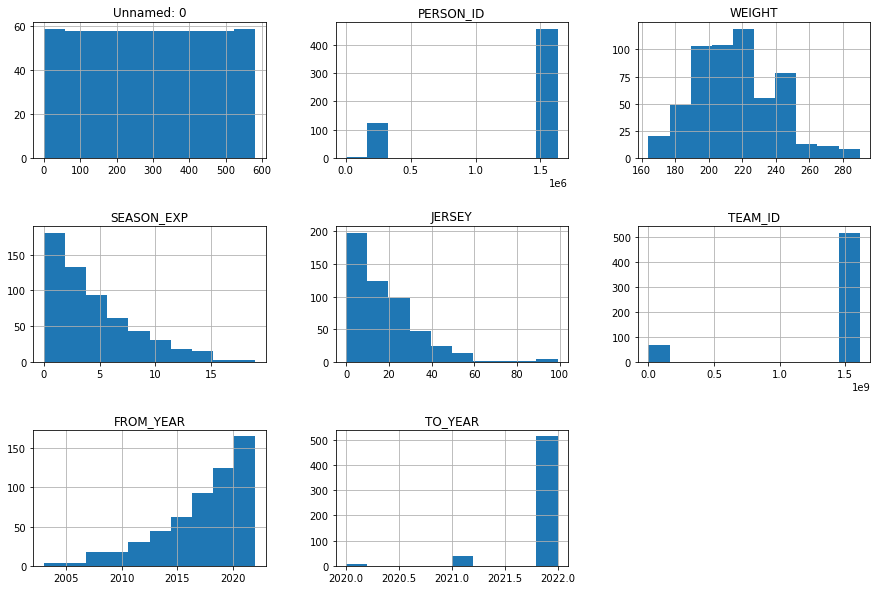

In [280]:
df.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);

In [281]:
df.PERSON_ID.describe().T

count    5.820000e+02
mean     1.319536e+06
std      5.906080e+05
min      2.544000e+03
25%      1.626182e+06
50%      1.629604e+06
75%      1.630539e+06
max      1.631466e+06
Name: PERSON_ID, dtype: float64

In [282]:
df.TEAM_ID.describe().T

count    5.820000e+02
mean     1.427966e+09
std      5.111383e+08
min      0.000000e+00
25%      1.610613e+09
50%      1.610613e+09
75%      1.610613e+09
max      1.610613e+09
Name: TEAM_ID, dtype: float64

In [283]:
df_team.TEAM_ID.describe().T

count    5.160000e+02
mean     1.610613e+09
std      8.665404e+00
min      1.610613e+09
25%      1.610613e+09
50%      1.610613e+09
75%      1.610613e+09
max      1.610613e+09
Name: TEAM_ID, dtype: float64

* PERSON_ID: noticeable gap, i.e. LeBron James is at 2544 while the vast majority of players are above 1626182
* TEAM_ID: players without a team listed skew TEAM_ID to 0. Most TEAM_ID's are approximately 1610613000.
* WEIGHT, FROM_YEAR, SEASON_EXP: appear to not have any outliers or incorrect data. HEIGHT is missing due to being an object and not float or integer.
* TO_YEAR: 2020 and 2021 may be inactive players.
*

In [284]:
height_count = df.groupby('HEIGHT')['HEIGHT'].count().reset_index(name='count').sort_values(['HEIGHT'])
height_count = height_count.set_index('HEIGHT')

<Figure size 1440x360 with 0 Axes>

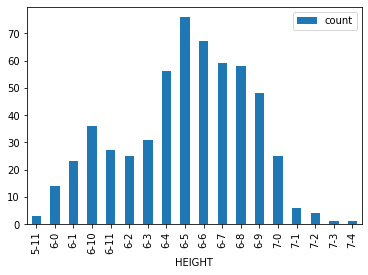

In [285]:
plt.figure(figsize=(20, 5))
height_count.plot(kind="bar")
plt.show()

In [286]:
for i, row in df.iterrows():
    
    try:
#         print(i)
        HEIGHT_DEC = float(row['HEIGHT'][0]) + round((float(row['HEIGHT'][2:4]) / 12), 3)
        df.at[i,'HEIGHT_DEC'] = HEIGHT_DEC
    except TypeError as e:
#         print(e)
        pass

<Figure size 1440x360 with 0 Axes>

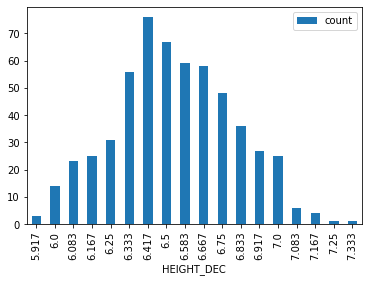

In [287]:
height_count = df.groupby('HEIGHT_DEC')['HEIGHT_DEC'].count().reset_index(name='count').sort_values(['HEIGHT_DEC'])
height_count = height_count.set_index('HEIGHT_DEC')
plt.figure(figsize=(20, 5))
height_count.plot(kind="bar")
plt.show()

In [288]:
# Resetting pandas display options to reduce the load time of the entire data frame

pd.reset_option('display.max_rows', silent=True)

In [289]:
df.head(23)

,Unnamed: 0,PERSON_ID,FIRST_NAME,LAST_NAME,DISPLAY_FIRST_LAST,DISPLAY_LAST_COMMA_FIRST,DISPLAY_FI_LAST,PLAYER_SLUG,BIRTHDATE,SCHOOL,COUNTRY,LAST_AFFILIATION,HEIGHT,WEIGHT,SEASON_EXP,JERSEY,POSITION,ROSTERSTATUS,GAMES_PLAYED_CURRENT_SEASON_FLAG,TEAM_ID,TEAM_NAME,TEAM_ABBREVIATION,TEAM_CODE,TEAM_CITY,PLAYERCODE,FROM_YEAR,TO_YEAR,DLEAGUE_FLAG,NBA_FLAG,GAMES_PLAYED_FLAG,DRAFT_YEAR,DRAFT_ROUND,DRAFT_NUMBER,GREATEST_75_FLAG,HEIGHT_DEC
0,0,1630173,Precious,Achiuwa,Precious Achiuwa,"Achiuwa, Precious",P. Achiuwa,precious-achiuwa,1999-09-19T00:00:00,Memphis,Nigeria,Memphis/Nigeria,6-8,225.0,2,5.0,Forward,Active,Y,1610612761,Raptors,TOR,raptors,Toronto,precious_achiuwa,2020.0,2022.0,N,Y,Y,2020,1,20,N,6.667
1,1,203500,Steven,Adams,Steven Adams,"Adams, Steven",S. Adams,steven-adams,1993-07-20T00:00:00,Pittsburgh,New Zealand,Pittsburgh/New Zealand,6-11,265.0,9,4.0,Center,Active,Y,1610612763,Grizzlies,MEM,grizzlies,Memphis,steven_adams,2013.0,2022.0,N,Y,Y,2013,1,12,N,6.917
2,2,1628389,Bam,Adebayo,Bam Adebayo,"Adebayo, Bam",B. Adebayo,bam-adebayo,1997-07-18T00:00:00,Kentucky,USA,Kentucky/USA,6-9,255.0,5,13.0,Center-Forward,Active,Y,1610612748,Heat,MIA,heat,Miami,bam_adebayo,2017.0,2022.0,N,Y,Y,2017,1,14,N,6.750
3,3,1630534,Ochai,Agbaji,Ochai Agbaji,"Agbaji, Ochai",O. Agbaji,ochai-agbaji,2000-04-20T00:00:00,Kansas,USA,Kansas/USA,6-5,215.0,0,30.0,Guard,Active,Y,1610612762,Jazz,UTA,jazz,Utah,ochai_agbaji,2022.0,2022.0,Y,Y,Y,2022,1,14,N,6.417
4,4,1630583,Santi,Aldama,Santi Aldama,"Aldama, Santi",S. Aldama,santi-aldama,2001-01-10T00:00:00,Loyola-Maryland,Spain,Loyola-Maryland/Spain,7-0,215.0,1,7.0,Forward-Center,Active,Y,1610612763,Grizzlies,MEM,grizzlies,Memphis,santi_aldama,2021.0,2022.0,Y,Y,Y,2021,1,30,N,7.000
5,5,1629638,Nickeil,Alexander-Walker,Nickeil Alexander-Walker,"Alexander-Walker, Nickeil",N. Alexander-Walker,nickeil-alexander-walker,1998-09-02T00:00:00,Virginia Tech,Canada,Virginia Tech/Canada,6-5,205.0,3,9.0,Guard,Active,Y,1610612750,Timberwolves,MIN,timberwolves,Minnesota,nickeil_alexander-walker,2019.0,2022.0,Y,Y,Y,2019,1,17,N,6.417
6,6,1628960,Grayson,Allen,Grayson Allen,"Allen, Grayson",G. Allen,grayson-allen,1995-10-08T00:00:00,Duke,USA,Duke/USA,6-4,198.0,4,12.0,Guard,Active,Y,1610612749,Bucks,MIL,bucks,Milwaukee,grayson_allen,2018.0,2022.0,Y,Y,Y,2018,1,21,N,6.333
7,7,1628386,Jarrett,Allen,Jarrett Allen,"Allen, Jarrett",J. Allen,jarrett-allen,1998-04-21T00:00:00,Texas,USA,Texas/USA,6-9,243.0,5,31.0,Center,Active,Y,1610612739,Cavaliers,CLE,cavaliers,Cleveland,jarrett_allen,2017.0,2022.0,N,Y,Y,2017,1,22,N,6.750
8,8,1630631,Jose,Alvarado,Jose Alvarado,"Alvarado, Jose",J. Alvarado,jose-alvarado,1998-04-12T00:00:00,Georgia Tech,USA,Georgia Tech/USA,6-0,179.0,1,15.0,Guard,Active,Y,1610612740,Pelicans,NOP,pelicans,New Orleans,jose_alvarado,2021.0,2022.0,Y,Y,Y,Undrafted,Undrafted,Undrafted,N,6.000
9,9,203937,Kyle,Anderson,Kyle Anderson,"Anderson, Kyle",K. Anderson,kyle-anderson,1993-09-20T00:00:00,UCLA,USA,UCLA/USA,6-9,230.0,8,5.0,Forward-Guard,Active,Y,1610612750,Timberwolves,MIN,timberwolves,Minnesota,kyle_anderson,2014.0,2022.0,Y,Y,Y,2014,1,30,N,6.750


Through using print(i) to troubleshoot the HEIGHT > HEIGHT_DEC loop, index 22 LiAngelo Ball is the first player to not have a HEIGHT listed, yet the loop still assigned a HEIGHT_DEC of 6.500. I suspect few HEIGHT_DEC that are not rounding to 3 places are leftover and probably incorrect heights of the players depending on which player follows in the data frame.

In [290]:
df[df['HEIGHT'].isna()]

,Unnamed: 0,PERSON_ID,FIRST_NAME,LAST_NAME,DISPLAY_FIRST_LAST,DISPLAY_LAST_COMMA_FIRST,DISPLAY_FI_LAST,PLAYER_SLUG,BIRTHDATE,SCHOOL,COUNTRY,LAST_AFFILIATION,HEIGHT,WEIGHT,SEASON_EXP,JERSEY,POSITION,ROSTERSTATUS,GAMES_PLAYED_CURRENT_SEASON_FLAG,TEAM_ID,TEAM_NAME,TEAM_ABBREVIATION,TEAM_CODE,TEAM_CITY,PLAYERCODE,FROM_YEAR,TO_YEAR,DLEAGUE_FLAG,NBA_FLAG,GAMES_PLAYED_FLAG,DRAFT_YEAR,DRAFT_ROUND,DRAFT_NUMBER,GREATEST_75_FLAG,HEIGHT_DEC
22,22,1629071,LiAngelo,Ball,LiAngelo Ball,"Ball, LiAngelo",L. Ball,liangelo-ball,1998-11-24T00:00:00,,USA,UCLA/USA,NaN,NaN,0,NaN,NaN,Inactive,Y,0,NaN,NaN,NaN,NaN,liangelo_ball,NaN,NaN,Y,N,Y,2018,NaN,NaN,N,NaN
41,41,1631262,Jules,Bernard,Jules Bernard,"Bernard, Jules",J. Bernard,jules-bernard,2000-01-21T00:00:00,UCLA,USA,UCLA/USA,NaN,NaN,0,NaN,NaN,Inactive,Y,0,NaN,NaN,NaN,NaN,jules_bernard,NaN,NaN,Y,N,Y,Undrafted,Undrafted,Undrafted,N,NaN
45,45,1631234,Marcus,Bingham Jr.,Marcus Bingham Jr.,"Bingham Jr., Marcus",M. Bingham Jr.,marcus-bingham-jr,2000-07-14T00:00:00,Michigan State,USA,Michigan State/USA,NaN,NaN,0,NaN,NaN,Inactive,Y,0,NaN,NaN,NaN,NaN,marcus_bingham_jr,NaN,NaN,N,N,Y,Undrafted,Undrafted,Undrafted,N,NaN
68,68,1631122,Gabe,Brown,Gabe Brown,"Brown, Gabe",G. Brown,gabe-brown,2000-03-05T00:00:00,Michigan State,USA,Michigan State/USA,NaN,NaN,0,NaN,NaN,Inactive,Y,0,NaN,NaN,NaN,NaN,gabe_brown,NaN,NaN,Y,N,Y,Undrafted,Undrafted,Undrafted,N,NaN
113,113,1630622,Jalen,Crutcher,Jalen Crutcher,"Crutcher, Jalen",J. Crutcher,jalen-crutcher,1999-07-18T00:00:00,Dayton,USA,Dayton/USA,NaN,NaN,0,NaN,NaN,Inactive,Y,0,NaN,NaN,NaN,NaN,jalen_crutcher,NaN,NaN,Y,N,Y,Undrafted,Undrafted,Undrafted,N,NaN
148,148,1631347,Anthony,Duruji,Anthony Duruji,"Duruji, Anthony",A. Duruji,anthony-duruji,1998-07-22T00:00:00,Florida,USA,Florida/USA,NaN,NaN,0,NaN,NaN,Inactive,Y,0,NaN,NaN,NaN,NaN,anthony_duruji,NaN,NaN,Y,N,Y,Undrafted,Undrafted,Undrafted,N,NaN
169,169,203583,Abdul,Gaddy,Abdul Gaddy,"Gaddy, Abdul",A. Gaddy,abdul-gaddy,1992-01-26T00:00:00,Washington,USA,Washington/USA,NaN,NaN,0,NaN,NaN,Inactive,Y,0,NaN,NaN,NaN,NaN,abdul_gaddy,NaN,NaN,Y,N,Y,2013,0,0,N,NaN
185,185,1631371,Grant,Golden,Grant Golden,"Golden, Grant",G. Golden,grant-golden,1998-01-15T00:00:00,Richmond,USA,Richmond/USA,NaN,NaN,0,NaN,NaN,Inactive,Y,0,NaN,NaN,NaN,NaN,grant_golden,NaN,NaN,Y,N,Y,Undrafted,Undrafted,Undrafted,N,NaN
191,191,1630564,RaiQuan,Gray,RaiQuan Gray,"Gray, RaiQuan",R. Gray,raiquan-gray,1999-07-07T00:00:00,Florida State,USA,Florida State/USA,NaN,NaN,0,NaN,NaN,Inactive,Y,0,NaN,NaN,NaN,NaN,raiquan_gray,NaN,NaN,Y,N,Y,2021,2,59,N,NaN
203,203,1631338,Mouhamadou,Gueye,Mouhamadou Gueye,"Gueye, Mouhamadou",M. Gueye,mouhamadou-gueye,1998-07-06T00:00:00,Pittsburgh,USA,Pittsburgh/USA,NaN,NaN,0,NaN,NaN,Inactive,Y,0,NaN,NaN,NaN,NaN,mouhamadou_gueye,NaN,NaN,Y,N,Y,Undrafted,Undrafted,Undrafted,N,NaN


These are all junior players and inactive on roster.

If they were more seasoned players, I can also impute the 33 missing heights with the mean or median height of each position.

In [291]:
df = df[df['HEIGHT'].notna()]
df = df.reset_index().copy().drop(columns=['index', 'Unnamed: 0'])

<Figure size 1440x360 with 0 Axes>

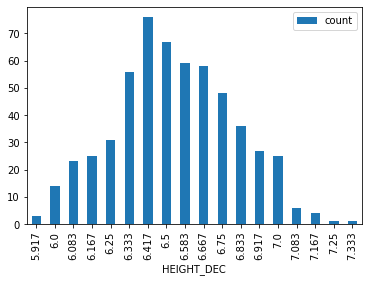

In [292]:
height_count = df.groupby('HEIGHT_DEC')['HEIGHT_DEC'].count().reset_index(name='count').sort_values(['HEIGHT_DEC'])
height_count = height_count.set_index('HEIGHT_DEC')
plt.figure(figsize=(20, 5))
height_count.plot(kind="bar")
plt.show()

Starting with 582 players and 33 features, other than some odd ID's that are much different than the majority, there does not appear to be any suspicious outliers of incorrect entry or data.

Certain columns dropped due to redundancies for players' and teams' names, or unnecessary flags such as GAMES_PLAYED_CURRENT_SEASON_FLAG and DLEAGUE_FLAG.

Finally I converted the string height column from string to float, 6-0 to 6.0 for example, due to 6-10 and 6-11 sorting between 6-1 and 6-2 instead of 6-9 and 7-0.
I eventually dropped 22 players that did not have a HEIGHT listed. The players also had 0 SEASON_EXP, inactive ROSTERSTATUS, and NaN for TEAM.